### Zip lists to build a DataFrame

In [1]:
list_keys = ['Country', 'Total']
country = ['United States', 'Soviet Union', 'United Kingdom']
total = [1118, 473, 273]
list_values = [country, total]
zipped = list(zip(list_keys, list_values))
zipped

[('Country', ['United States', 'Soviet Union', 'United Kingdom']),
 ('Total', [1118, 473, 273])]

In [2]:
zipped_dict = dict(zipped)
zipped_dict

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [3]:
import pandas as pd
df = pd.DataFrame(zipped_dict)
df

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### Building DataFrames with broadcasting

You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames.

In [4]:
df['planet'] = 'Earth' # Broadcast the value for each row
df

,Country,Total,planet
0,United States,1118,Earth
1,Soviet Union,473,Earth
2,United Kingdom,273,Earth


In [5]:
df['Continent'] = ['North America', 'Asia','Europe']
df

,Country,Total,planet,Continent
0,United States,1118,Earth,North America
1,Soviet Union,473,Earth,Asia
2,United Kingdom,273,Earth,Europe


### Reading CSV File
- `read_csv()` method assume the first row of the data as column names.
- If we know that the first row in csv file is not column name, but the data then we can use `header = None`
- If we know that the first column in csv is index column, then use `index_col = 0`
- If we want to change the name of column then pass list of column names to `names` argument. Also, make sure to use `header = 0` while renaming.

In [6]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cars.csv")
df

,Unnamed: 0,cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [7]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cars.csv", index_col = 0)
df

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [8]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cars_with_no_heading.csv")
df

,US,809,United States,TRUE
0,AUS,731,Australia,False
1,JAP,588,Japan,False
2,IN,18,India,False
3,RU,200,Russia,True
4,MOR,70,Morocco,True
5,EG,45,Egypt,True


In [9]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cars_with_no_heading.csv", header = None)
df

,0,1,2,3
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [10]:
column_name = ['CPC', 'Country', 'Drives_Right']

# set column name
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cars.csv", header = 0, names = column_name)
df

,CPC,Country,Drives_Right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


### Reading Messy Data

In [11]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\messy.csv")
df

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 45.51 43.56 48.70 53.88 55.40,NaN
# That MSFT is MicroSoft,NaN
GOOGLE 512.42 537.99 559.72 540.50 535.24 532.92 590.09 636.84 617.93 663.59 735.39 755.35,NaN
APPLE 110.64 125.43 125.97 127.29 128.76 127.81 125.34 113.39 112.80 113.36 118.16 111.73,NaN
# Maybe we should have bought some Apple stock in 2008?,NaN


In [12]:
# Remove comments preceded with #
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\messy.csv", comment = '#')
df

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 45.51 43.56 48.70 53.88 55.40,NaN
GOOGLE 512.42 537.99 559.72 540.50 535.24 532.92 590.09 636.84 617.93 663.59 735.39 755.35,NaN
APPLE 110.64 125.43 125.97 127.29 128.76 127.81 125.34 113.39 112.80 113.36 118.16 111.73,NaN


In [13]:
# use row number 4 (indexed by 3) as column header
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\messy.csv", comment = '#', header = 3)
df

,name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
0,IBM 156.08 160.01 159.81 165.22 172.25 167.15 ...
1,MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61...
2,GOOGLE 512.42 537.99 559.72 540.50 535.24 532....
3,APPLE 110.64 125.43 125.97 127.29 128.76 127.8...


In [14]:
# first use " " as delimiter and then use first column as index
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\messy.csv", comment = '#', header = 3, delimiter = ' ', index_col = 0)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
name,,,,,,,,,,,,
IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [15]:
# Save the new formatted data into a CSV
df.to_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cleaned_messy.csv')

In [16]:
# Save the new formatted data into a CSV
df.to_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cleaned_messy_1.csv', index = False)

##  Data Visualization

- Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. 
- The pandas .plot() method makes calls to matplotlib to construct the plots. 

In [17]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\weather_data_austin_2010.csv")
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [18]:
df = df.iloc[:100]

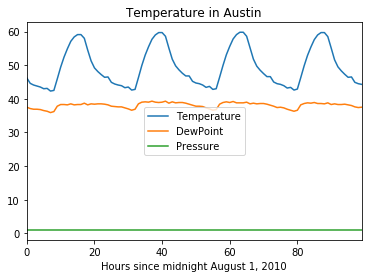

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()
plt.title('Temperature in Austin')
plt.xlabel('Hours since midnight August 1, 2010')
plt.show()

- Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling df.plot() will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000127F1DDF470>,
      dtype=object)

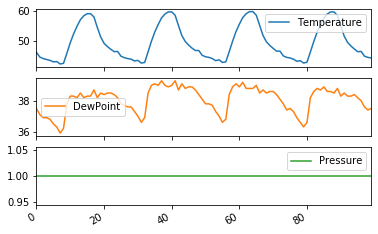

In [20]:
df.plot(subplots = True)

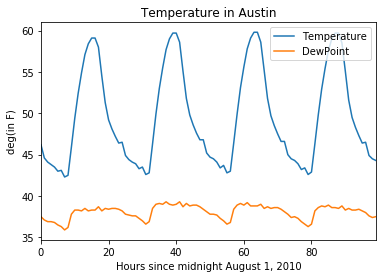

In [21]:
df[['Temperature', 'DewPoint']].plot()
plt.title('Temperature in Austin')
plt.xlabel('Hours since midnight August 1, 2010')
plt.ylabel('deg(in F)')
plt.show()

## Visual EDA

In [22]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\cleaned_messy.csv", header = None)
display(df)
df = df.T
display(df)
df_column_name = df.loc[0]
df_data = df.loc[1:]
display(df_column_name)
display(df_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
2,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.7,53.88,55.4
3,GOOGLE,512.42,537.99,559.72,540.5,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
4,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.8,113.36,118.16,111.73


,0,1,2,3,4
0,name,IBM,MSFT,GOOGLE,APPLE
1,Jan,156.08,45.51,512.42,110.64
2,Feb,160.01,43.08,537.99,125.43
3,Mar,159.81,42.13,559.72,125.97
4,Apr,165.22,43.47,540.5,127.29
5,May,172.25,47.53,535.24,128.76
6,Jun,167.15,45.96,532.92,127.81
7,Jul,164.75,45.61,590.09,125.34
8,Aug,152.77,45.51,636.84,113.39
9,Sep,145.36,43.56,617.93,112.8


0      name
1       IBM
2      MSFT
3    GOOGLE
4     APPLE
Name: 0, dtype: object

,0,1,2,3,4
1,Jan,156.08,45.51,512.42,110.64
2,Feb,160.01,43.08,537.99,125.43
3,Mar,159.81,42.13,559.72,125.97
4,Apr,165.22,43.47,540.5,127.29
5,May,172.25,47.53,535.24,128.76
6,Jun,167.15,45.96,532.92,127.81
7,Jul,164.75,45.61,590.09,125.34
8,Aug,152.77,45.51,636.84,113.39
9,Sep,145.36,43.56,617.93,112.8
10,Oct,146.11,48.7,663.59,113.36


In [23]:
df_column_name = list(df_column_name)
df_column_name[0] = 'month'
df_data.columns = list(df_column_name)

In [24]:
df_data.columns

Index(['month', 'IBM', 'MSFT', 'GOOGLE', 'APPLE'], dtype='object')

#### To change data type of a column, use `astype()` method

In [25]:
df_data = df_data.astype({'IBM':'float', 'MSFT':'float', 'GOOGLE':'float', 'APPLE':'float'})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 5 columns):
month     12 non-null object
IBM       12 non-null float64
MSFT      12 non-null float64
GOOGLE    12 non-null float64
APPLE     12 non-null float64
dtypes: float64(4), object(1)
memory usage: 576.0+ bytes


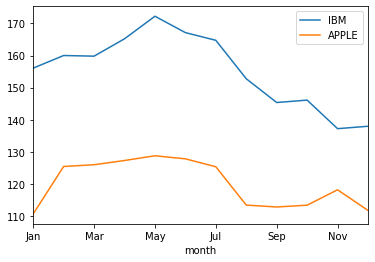

In [26]:
df_data.info()
df_data.plot(x = 'month', y = ['IBM', 'APPLE'])

- Create a scatter plot to show relationship between 'hp' and 'mpg
- Create boxplots for 'weight' and 'mpg'
- Create PDF 

In [27]:
df = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\auto-mpg.csv')
print(df.shape)
df.head()

(392, 9)


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


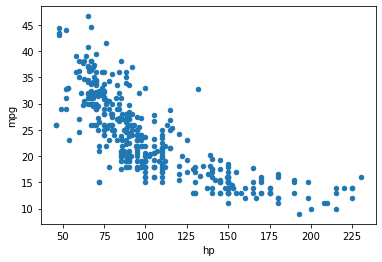

In [28]:
# Higher Horse power corresonds to low Mileage
df.plot(kind = 'scatter', x = 'hp', y = 'mpg')

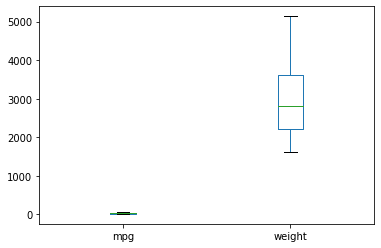

In [29]:
df[['mpg','weight']].plot(kind = 'box')

mpg          AxesSubplot(0.125,0.125;0.352273x0.755)
weight    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

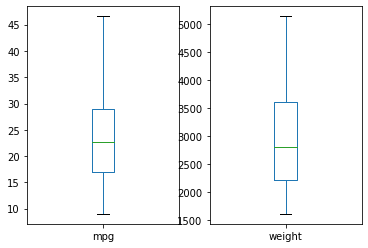

In [30]:
df[['mpg','weight']].plot(kind = 'box', subplots = True)

- Pandas relies on the `.hist()` method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).
- When plotting the PDF, you need to specify `normed=True`
- Since `normed=True` is now deprecated, use `density=True`
- When plotting the CDF, you need to specify `cumulative=True` in addition to `density=True`

In [31]:
df = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


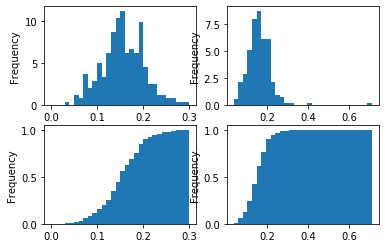

In [32]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=2)

df.fraction.plot(ax=axes[0][0], kind = 'hist', bins = 30, density = True, range = (0, 0.3))
df.fraction.plot(ax=axes[1][0], kind = 'hist', bins = 30, density = True, cumulative = True, range = (0, 0.3))
df.fraction.plot(ax=axes[0][1], kind = 'hist', bins = 30, density = True)
df.fraction.plot(ax=axes[1][1], kind = 'hist', bins = 30, density = True, cumulative = True)

- Here, Probability Distribution Function (PDF) shows the probabilty of getting tip between 0.1 and 0.2 fraction is equal to  area under the graph from 0.1 and 0.2
- Here, Cumulative Distribution Function (CDF) shows the probability of getting tip of 0.2 or below fraction of the total bill is more than 0.65

### Statistical EDA

- Use `.describe()` method for basic statistical analysis for numerical columns
- Quantile divides the data set into two part depending on what input is given.
- A quantile with 0.5 means meadian of the data set which mean that 50% of the data has lower value than the computed quantile output and 50% has higher value.

In [33]:
df = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\percent-bachelors-degrees-women-usa.csv', index_col = 0)
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


- Your job is to compute the minimum and maximum values of the 'Engineering' column and generate a line plot of the mean value of all 17 academic fields per year.

In [34]:
print(df['Engineering'].min())
print(df['Engineering'].max())

0.8
19.0


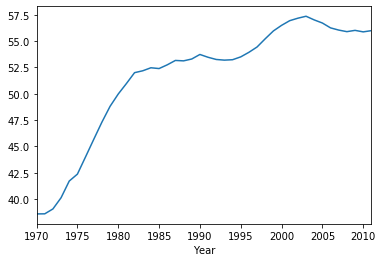

In [35]:
mean_val_per_year = df.mean(axis = 'columns')
mean_val_per_year.plot()

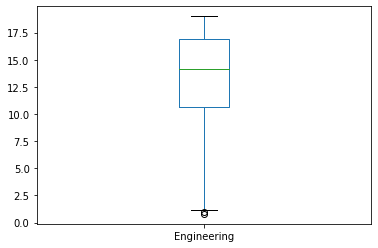

In [36]:
df['Engineering'].plot(kind = 'box')
# Here, you can see that some of the data points are below bottom whisker
# which means the whiskers does not represent minimum and maximum values

### Search how to drop column that you don't want to use

**Life expectancy in countries around the world.**
This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from Gapminder.

- First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset.
- Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. 
- Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

In [37]:
df = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\life_expectancy_at_birth.csv', index_col = 0)
df.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [38]:
df['2015'].count() # count method return count of non-null values present in a column

208

In [39]:
df.loc[:,'2000':].quantile([0.05,0.95])

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,50.34,50.94,51.3,51.58,52.20,52.78,52.835,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,79.20,79.46,79.6,79.72,80.06,80.26,80.610,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


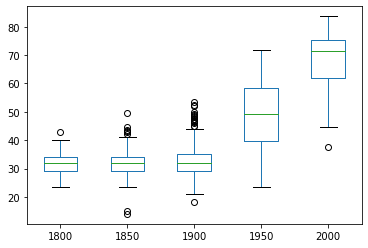

In [40]:
df[['1800','1850','1900','1950','2000']].plot(kind = 'box')

In [41]:
# Country having lower life expectancy in 2000 than the bottom whisker
df[df['2000'] == df['2000'].min()]

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
68,Eritrea,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,...,60.1,60.1,60.1,60.1,60.2,60.3,60.4,60.6,60.7,60.8


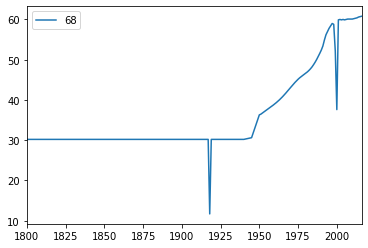

In [52]:
life_expectancy_Eritrea = df[df['Life expectancy'] == 'Eritrea']
life_expectancy_Eritrea_values = life_expectancy_Eritrea.loc[:,'1800':]
life_expectancy_Eritrea_values = life_expectancy_Eritrea_values.T
life_expectancy_Eritrea_values.plot()

- There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.
- Generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the 'fare' column and passenger class information is contained in the 'pclass' column.

In [48]:
titanic = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## To change size of plot, use `figsize = (a,b)` in `.plot()` method

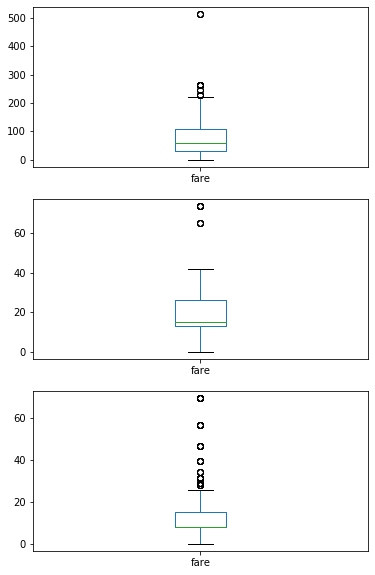

In [59]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)
titanic[titanic.pclass == 1]['fare'].plot(ax = axes[0], kind = 'box', figsize = (6,10))
titanic[titanic.pclass == 2].plot(ax = axes[1], kind = 'box', y = 'fare')
titanic[titanic.pclass == 3]['fare'].plot(ax = axes[2], kind = 'box')

# Time Series Analysis using pandas

- The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the pd.to_datetime() function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a format specification variable, such as `format='%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects. 

In [67]:
date_list = ['2015-01-01 091000','2015-01-01 092000']
date_format = '%Y-%m-%d %H%M%S'
date_object = pd.to_datetime(date_list, format = date_format)
date_object
temperature_list = [34.6, 33.2]
temperature = pd.Series(temperature_list, index = date_object)
temperature.index.name = 'Date Time'
temperature.name = 'Temperature'
temperature

Date Time
2015-01-01 09:10:00    34.6
2015-01-01 09:20:00    33.2
Name: Temperature, dtype: float64

### Partial string indexing and slicing
- Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed. 

In [72]:
austin = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\weather_data_austin_2010.csv', parse_dates = True, index_col = 'Date')
austin.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=8759, freq=None)

In [77]:
temp1 = austin.loc['2010-01-01':'2010-01-02']  # Index working even without mentioning anything about time
display(temp1.head())
print(temp1.count())

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


Temperature    48
DewPoint       48
Pressure       48
dtype: int64


In [80]:
temp2 = austin.loc['May 28th, 2010'] # Takes this format of date also
temp2.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-05-28 00:00:00,73.2,67.0,1.0
2010-05-28 01:00:00,71.9,67.2,1.0
2010-05-28 02:00:00,71.3,67.1,1.0
2010-05-28 03:00:00,70.7,67.0,1.0
2010-05-28 04:00:00,70.3,66.9,1.0


#### When using .loc to subset, the value at end index is also included

In [86]:
temp3 = austin.loc['2010/05/01 00':'2010/05/01 11']
temp3

,Temperature,DewPoint,Pressure
Date,,,
2010-05-01 00:00:00,67.6,60.9,1.0
2010-05-01 01:00:00,66.4,61.0,1.0
2010-05-01 02:00:00,65.6,60.6,1.0
2010-05-01 03:00:00,65.0,60.4,1.0
2010-05-01 04:00:00,64.7,60.4,1.0
2010-05-01 05:00:00,64.4,60.2,1.0
2010-05-01 06:00:00,64.2,59.7,1.0
2010-05-01 07:00:00,65.5,60.9,1.0
2010-05-01 08:00:00,68.1,61.4,1.0


### Reindexing the Index
- Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default. Use this syntax to resample. `ts_new = ts2.reindex(ts1.index)`

### Resampling and frequency
- Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. 
- For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean()`. 
- Both use the concept of 'method chaining' - `df.method1().method2().method3()` - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next. 

In [89]:
# downsample the 'Temperature' column to 6 hour data : df1
df1 = austin['Temperature'].resample('6H').mean()
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [90]:
# downsample the 'Temperature' column to daily data : df2
df2 = austin.Temperature.resample('D').count()
df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

In [93]:
august = austin.loc['August 2010']
august_highs = august.Temperature.resample('D').max()
august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [94]:
march = austin.loc['2010 March','Temperature']
march_lows = march.resample('D').min()
march_lows.head()

Date
2010-03-01    48.7
2010-03-02    49.1
2010-03-03    49.3
2010-03-04    49.7
2010-03-05    50.0
Freq: D, Name: Temperature, dtype: float64

### Resampling using Rolling means
- Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.
- Rolling Mean or Moving Average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

,unsoothed,smoothed
Date,,
2010-03-01 00:00:00,53.3,NaN
2010-03-01 01:00:00,51.8,NaN
2010-03-01 02:00:00,51.2,NaN
2010-03-01 03:00:00,50.6,NaN
2010-03-01 04:00:00,50.1,NaN
2010-03-01 05:00:00,49.4,51.066667
2010-03-01 06:00:00,49.5,50.433333
2010-03-01 07:00:00,48.7,49.916667
2010-03-01 08:00:00,50.6,49.816667


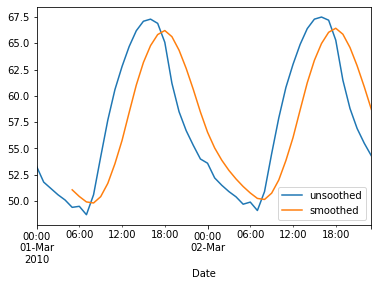

In [115]:
unsmoothed = austin.loc['March 01, 2010':'March 02, 2010', 'Temperature']

smoothed = unsmoothed.rolling(window = 6).mean()

march_12 = pd.DataFrame({'unsoothed':unsmoothed, 'smoothed':smoothed})
display(march_12.head(10))
march_12.plot()

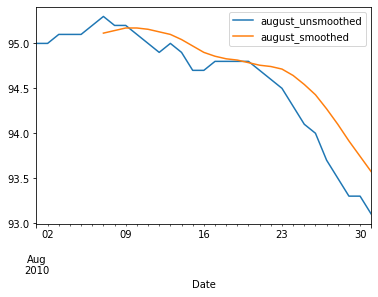

In [122]:
august_daily_temp = august.Temperature.resample('D').max()
august_daily_temp_smoothed_weekly = august.Temperature.resample('D').max().rolling(window = 7).mean()
august_new = pd.DataFrame({'august_unsmoothed':august_daily_temp, 'august_smoothed':august_daily_temp_smoothed_weekly})
august_new.plot()

In [162]:
airline = pd.read_csv('C:\\Users\\saifs\\Desktop\\data_science\\datasets\\austin_airport_departure_data_2015_july.csv', header = 10, parse_dates = True, index_col = 'Date (MM/DD/YYYY)')
airline.index.name = 'Date'
airline = airline.drop(airline.index[-1]) # Since the last row contained information about source of data 
airline = airline.drop('Unnamed: 17', axis = "columns") # Since this column contained only NaN
# You can also pass list of column names to drop
display(airline.head())
display(airline.tail())
display(airline.columns) # Carrier Code is preceded by few whitespaces
airline.columns = airline.columns.str.strip()
display(airline.columns)

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0


,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date,,,,,,,,,,,,,,,,
2015-07-31,WN,4819.0,N7741C,PHX,17:25,17:48,150.0,139.0,23.0,17:59,11.0,0.0,0.0,0.0,0.0,0.0
2015-07-31,WN,4913.0,N622SW,TPA,11:35,11:32,140.0,150.0,-3.0,11:46,14.0,0.0,0.0,0.0,0.0,0.0
2015-07-31,WN,4924.0,N910WN,LAX,16:00,16:51,185.0,176.0,51.0,17:04,13.0,6.0,0.0,0.0,0.0,36.0
2015-07-31,WN,4927.0,N8327A,DCA,12:40,13:48,195.0,175.0,68.0,13:59,11.0,0.0,0.0,0.0,0.0,48.0
2015-07-31,WN,5888.0,N290WN,DAL,20:00,21:04,55.0,49.0,64.0,21:13,9.0,0.0,0.0,0.0,0.0,58.0


Index(['  Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

- Find number to flights departure to Dallas
- Use `.str()` filtering and method chaining to generate summary statistics on flight delays each day to Dallas.

In [173]:
dallas = airline[airline['Destination Airport'].str.contains('DAL')]
# str.contains() method gives a series of Boolean values for the rows satisfying the condition.
# Summing up values will give the count
daily_dallas_departure = airline['Destination Airport'].str.contains('DAL').resample('D').sum()
display(daily_dallas_departure.head())
display(dallas.describe())

Date
2015-07-01    10.0
2015-07-02    10.0
2015-07-03    11.0
2015-07-04     3.0
2015-07-05     9.0
Freq: D, Name: Destination Airport, dtype: float64

,Flight Number,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.0,289.000000,289.0,289.000000
mean,1877.000000,56.366782,52.328720,8.806228,9.020761,1.650519,0.0,0.653979,0.0,5.162630
std,1703.055655,2.232277,6.133291,22.378619,2.257607,10.605898,0.0,4.115265,0.0,17.673285
min,187.000000,55.000000,0.000000,-7.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,657.000000,55.000000,50.000000,-2.000000,8.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,1017.000000,55.000000,52.000000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,2950.000000,60.000000,55.000000,9.000000,10.000000,0.000000,0.0,0.000000,0.0,0.000000
max,5888.000000,60.000000,79.000000,201.000000,20.000000,158.000000,0.0,60.000000,0.0,201.000000


In [209]:
df = pd.read_csv("C:\\Users\\saifs\\Desktop\\data_science\\datasets\\weather_data_austin_2010.csv")
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


(500, 2)

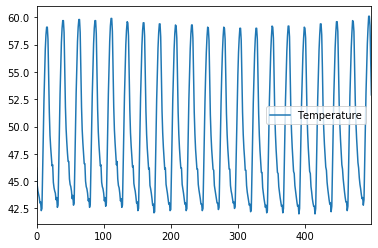

In [210]:
df = df[['Temperature','Date']][0:500]
df.plot()
df.shape

In [211]:
df.set_index('Date', inplace=True)

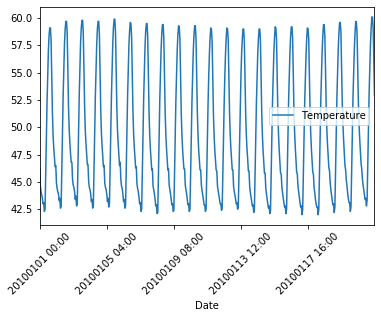

In [213]:
df.plot(rot = 45)

### Cleaning the numeric columns

- The numeric columns contain missing values labeled as 'M'. Because of these values, the data type of the column is object.
- Transform these columns such that they contain only numeric values and interpret missing data as NaN.
- The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like 'M' to be interpreted as NaN
- Eg. `df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')`